# Convex Optimization Theory

## A. Convex Sets

## A.1 Definition and Examples

> A set $X \subseteq \mathbb{R}^n$ is **convex** if it contains all of its segments, that is $$\lambda x + (1 - \lambda) y \in X, \qquad (\forall x, y, \lambda) \in X \times X \times [0, 1].$$

**Examples of Convex Sets:**
1. $\mathbb{R}^n$,
2. (Nonnegative orthant) $\mathbb{R}_+^n := \{x \in \mathbb{R}^n : x_i \geq 0, i = 1, \dots, n\}$,
3. Balls defined by an arbitrary norm, $\{x \in \mathbb{R}^n : ||x|| \leq 1\}$,
4. Affine subspace, $\{x \in \mathbb{R}^n : Ax = b\}$,
5. Polyhedrons, $\{x \in \mathbb{R}^n : Ax \leq b\}$,
6. The set of all positive semidefinite matrices $\mathsf{S}_+^n = \{A \in \mathbb{R}^{n \times n} : A = A^T, x^T Ax \geq 0 \text{ for all } x \in \mathbb{R}^n\}$,
7. Intersections of convex sets,
8. Weighted sums of convex sets.

**Constructing Convex Sets from Data (Convex Hulls)**

Given a set of points $E = \{p_i\}_{i = 1}^n =  \{(x_i, y_i)\}_{i = 1}^n \subset \mathbb{R}^2$, the **convex hull** of $E$ is given by $$\mathrm{co}(E) = \bigcap \{X: X \text{ is convex and } E \subset X\} = \left\{\sum_{j = 1}^n \lambda_j p_j : \lambda_j \geq 0 \text{ for all } j \text{ and } \sum_{j = 1}^n \lambda_j = 1\right\}.$$

We can use **Jarvis's Algorithm** to compute the convex hull $E$:
1. Initialize $p$ as the leftmost point.
2. The next point $q$ is the point such that the triplet $(p, q, r)$ is counter clockwise for any other point $r$. To find this, initialize $q$ as the next point, and then traverse through all points. If, for any point $i$, $i$ is more counter clockwise (i.e., the orientation of $p, i, q$ is counter clockwise, then update $q$ as $i$. The final value of $q$ is going to be the most counter clockwise point.
3. Store $q$ as next of $p$ in the output convex hull.
4. Set $p = q$ for the next interation.

We first import our modules and define the orientation of three planar points:

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def orientation(p, q, r):
    value = (q[1] - p[1])*(r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if value == 0:
        return 0
    return 1 if value > 0 else 2

Here, the orientation function returns 2 is the points are clockwise, 1 if counterclockwise, and 0 if collinear. It computes $\vec{PQ} \times \vec{QR}$. We now define the Jarvis's algorithm function:

In [15]:
def jarvis(points):
    if len(points) < 3:
        return points
    
    hull = []
    l = np.argmin(points[:, 0]) # Start with leftmost point
    p = l
    
    while True:
        hull.append(points[p])
        q = (p + 1) % len(points)
        
        for i in range(len(points)):
            if orientation(points[p], points[i], points[q]) == 2:
                q = i
        
        p = q
        if p == l:
            break
    
    return np.array(hull)

Now, we generate a random cluster of points, obtain the convex hull, and plot it.

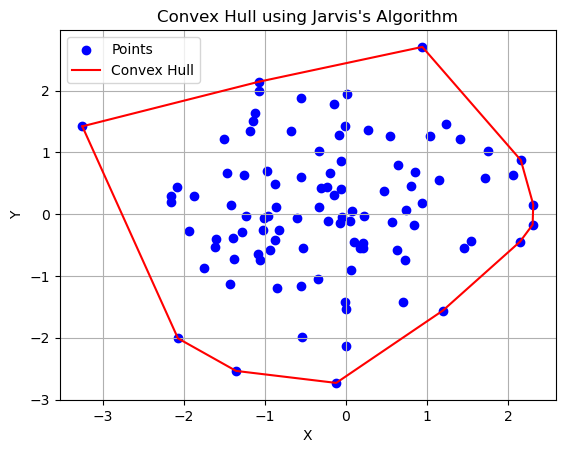

In [17]:
def generate_cluster(num_points, center, spread):
    x = np.random.normal(center[0], spread, num_points)
    y = np.random.normal(center[1], spread, num_points)
    return np.column_stack((x, y))

points = generate_cluster(100, (0, 0), 1)
hull = jarvis(points)

plt.scatter(points[:, 0], points[:, 1], c='b', label='Points')
plt.plot(hull[:, 0], hull[:, 1], 'r-', label='Convex Hull')
plt.plot([hull[-1, 0], hull[0, 0]], [hull[-1, 1], hull[0, 1]], 'r-')
plt.title("Convex Hull using Jarvis's Algorithm")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

## A.2 Projection onto Convex Sets

> Let $X \subset \mathbb{R}^n$ be a closed convex set. For any $y \in \mathbb{R}^n$, we define the closest point to $y$ in $X$ as $$\mathrm{Proj}_X(y) = \arg \min_{x \in X} ||y - x||_2^2.$$ $\mathrm{Proj}_X(y)$ is the **projection of $y$ onto $X$**. 

- $X$ must be closed for the projection to be well defined. In fact, for every closed convex set $X \subset \mathbb{R}^n$, the projection $\mathrm{Proj}_X(y)$ must exist for all $y \in \mathbb{R}^n$.
    - If $\{x_i\} \subseteq X$ is a sequence such that $$||y - x_i||_{2} \to \inf_{x \in X} ||y - x||_2, \qquad i \to \infty$$ then the sequence $\{x_i\}$ clearly is bounded. Passing to a subsequence, assume $x_i \to \overline{x}$ as $i \to \infty$. Since $X$ is closed, $\overline{x} \in X$, and $$||y - \overline{x}||_2 = \lim_{i \to \infty} ||y - x_i||_2 = \inf_{x \in X} ||y - x||_2.$$
- Moreover, for $X$ closed and convex, this projection is always unique.
    - If $a$ and $b$ are the two closest points in $X$ to a given point $y$, let $z = (a + b)/2$, which is in $X$ since $X$ is convex. Therefore, $||y - z||_2 \geq d = ||y - a||_2 = ||y - b||_2$. Now, $$||(y - a) + (y - b)||_2^2 + ||(y - a) - (y - b)||_2^2 = ||2(y - z)||_2^2  + ||a - b||_2^2 = 2||y - a||_2^2 + 2||y - b||_2^2 = 4d^2.$$ But, $||2(y - z)||_2^2 \geq 4d^2$, this forces $||a - b|| = 0$, so $ a = b$. 